**Abstract**:  


# Introduction

This document describes the development and analysis of the results of a Rogowski coil design and signal conditioning circuit

# Methodology 

## FEM Modeling

![Boundaries](images/Dimensions.png)

![Boundaries](images/FEMMMesh.PNG)

![Boundaries](images/FEEM_Boundary.PNG)

![FEMM Rogowski Coil](images/FEMMRogowskiCoil.PNG)

In [1]:
import femm
import time
import os
import numpy as np
import cmath as cm
import random
import pandas as pd 
from ipywidgets import IntProgress
from IPython.display import display
from scipy import fftpack
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
%matplotlib inline

In [2]:
# cell for simulate a Rogowski coil in FEMM tool
femm.openfemm()
femm.opendocument("simulations/femm/rogowski_simulation.fem");
femm.mi_saveas("simulations/femm/temp.fem")
femm.mi_seteditmode("group")
vr=[];
f=[];

units = "millimeters"
stype = 'planar'
precision = 10**-8
depth = 1
minangle = 30
acsolver = 0 # 0 to successive approximation or 1 to Newton  

# number of interaction
init = 0
final = 4 

progress = IntProgress(min=init, max=final,
                       description='Simulation:') # instantiate the bar
display(progress) # display the bar

init_time = time.time()

for n in range(init,final): 
    if n == 0:
        n=0.00001
        
    freq = 1000*n
    f.append(freq)
    femm.mi_probdef(freq,units,stype,precision,depth,minangle,(acsolver))
    femm.mi_analyze()
    femm.mi_loadsolution()
    femm.mo_groupselectblock(1)
    v=femm.mo_getcircuitproperties("Ir")
    vr.append(v[1]) # get the voltage drop of Ir
    progress.value = n+1
femm.closefemm()

print('Time: ' + str(time.time() - init_time) + 's')

IntProgress(value=0, description='Simulation:', max=4)

Time: 23.13398551940918s


## Signal Conditionig

### Integrator



## LTspice Simulations

### In this step, the simulated results are imported to compare with original current.

![Simulated Circuit in LTspice](images/circuit_anti_aliasing.PNG)

### The folowing image, represents the simulated circuit. 

### Low Pass Filter

### Instrumentation PGA 

### DC Offset

### Monte Carlo simulation

# Results

## FEM Analisys

## Monte Carlo Simulations

## Measurement Uncertainty

## Error in frequency response

# Conclusion

# Monte Carlo Simulation

### The folowing image, represents the Monte Carlo  simulated circuit. 

![Simulated Circuit in LTspice](images/circuit_anti_aliasing.PNG)

#### And below, the implementation of a function to parse a .txt file with results of simulation

## Plot of Rogowski coil frequency response 

Text(0.5, 0, 'Frequency [Hz]')

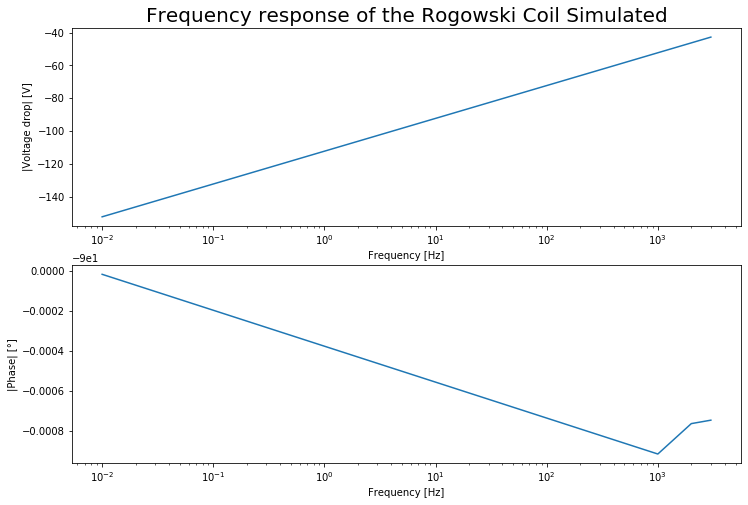

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax[0].semilogx(f,20*np.log10(np.abs(vr)/100))
ax[0].set_ylabel('|Voltage drop| [V]')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_title('Frequency response of the Rogowski Coil Simulated', fontsize=20)

ax[1].semilogx(f,np.angle(vr)*180/np.pi)
ax[1].set_ylabel('|Phase| [°]')
ax[1].set_xlabel('Frequency [Hz]')

## Gain of Rogowski Coil

In [4]:
gain = np.abs(vr[-1])/(100*f[-1])
display(gain)

2.4416613655426696e-06

In [5]:
# Read a file with real values of current, sampled in a 
# didatic plant for vibration analysis
file_data = pd.read_csv('simulations/MotorDesbalanceado.csv')
    
# get set of data from .csv file
data = 330*file_data['Amperimeter']
len_data = len(data)
   
init = 0.5
final = 0.55

# sample Rate in Hz
f_s = 10000

data_plot = data[int(init*len_data+1):int(final*len_data)]
fft_data = fftpack.fft(data_plot)
amplitude = np.abs(fft_data)
phase = np.angle(fft_data)
freqs = fftpack.fftfreq(len(data_plot)) * f_s

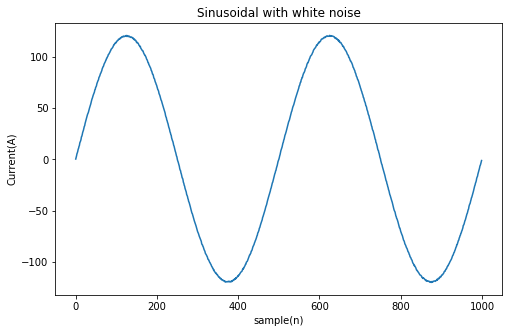

In [6]:
# Another possibility, is create a new signal with white noise,
# creating a more controllable scenario to simulate
Fs = 10000
f = 20
x = np.arange(len_data)
noise = 3e-8*np.asarray(random.sample(range(0,len_data),len_data))
 
y_noise = 120*(np.sin(2 * np.pi * f * x / Fs)+noise)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.plot(y_noise[0:1000])
ax.set_ylabel('Current(A)')
ax.set_xlabel('sample(n)')
ax.set_title('Sinusoidal with white noise')

data_plot_sml = y_noise[int(init*len_data+1):int(final*len_data)]
fft_data_sml = fftpack.fft(data_plot_sml)
amplitude_sml = np.abs(fft_data_sml)
phase_sml = np.angle(fft_data_sml)
freqs_sml = fftpack.fftfreq(len(data_plot_sml)) * f_s

In [7]:
# Calculates the Rogowski voltage from the product between Rogowski coil frequency
# response and the currente imported from another sensor
AmplReal = []
PhsReal = []
polarReal = []

AmplSml = []
PhsSml = []
polarSml = []

for n in range(0, len(freqs)):
    AmplReal.append(amplitude[n]*gain*freqs[n])
    PhsReal.append(phase[n]*(180/np.pi) + 90)
    polarReal.append(cm.rect(AmplReal[n], PhsReal[n]))
    
    AmplSml.append(amplitude_sml[n]*gain*freqs_sml[n])
    PhsSml.append(phase_sml[n]*(180/np.pi) + 90)
    polarSml.append(cm.rect(AmplSml[n], PhsSml[n]))

C:\Users\Gpiaia\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gpiaia\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gpiaia\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
C:\Users\Gpiaia\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


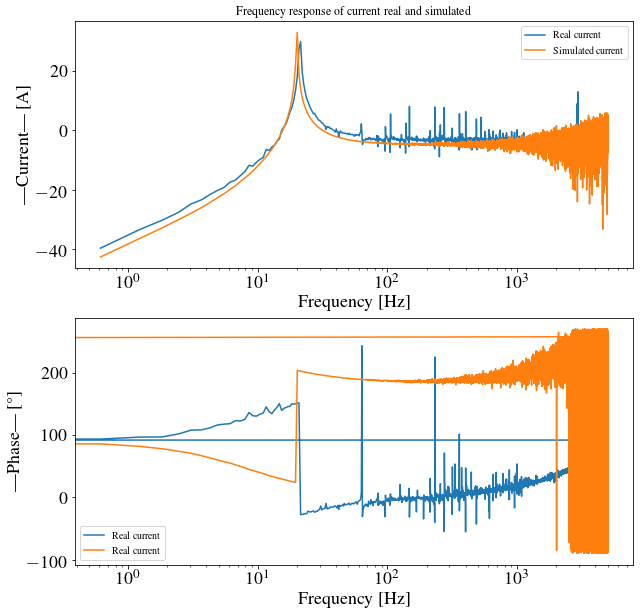

In [9]:
# Rogowski voltage Frequency response of a real current
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax[0].semilogx(freqs,20*np.log10(AmplReal), label='Real current')
ax[0].semilogx(freqs_sml,20*np.log10(AmplSml), label='Simulated current')
ax[0].set_ylabel('|Current| [A]')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_title('Frequency response of current real and simulated')
ax[0].legend()

ax[1].semilogx(freqs,PhsReal, label='Real current')
ax[1].semilogx(freqs_sml,PhsSml, label='Real current')
ax[1].set_ylabel('|Phase| [°]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend()

C:\Users\Gpiaia\Anaconda3.1\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


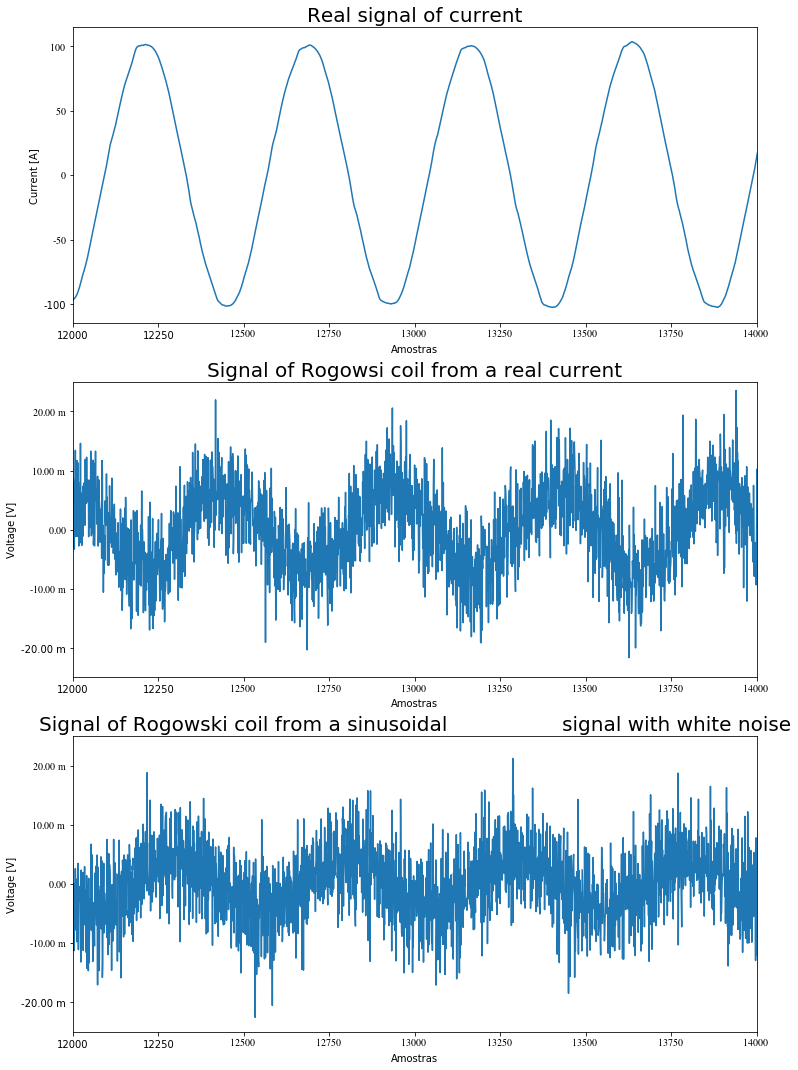

In [8]:
# Inverse fft of the Rogowski voltage of a real current
signal_rogowski_real = fftpack.ifft(polarReal)
signal_rogowski_sml = fftpack.ifft(polarSml)

# plot and compare ifft with a real current
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))
formatter1 = EngFormatter(places=2)

ax[0].plot(data)
ax[0].set_ylabel('Current [A]')
ax[0].set_xlabel('Amostras')
ax[0].set_xlim(12000, 14000)
ax[0].set_title('Real signal of current', fontsize=20)

ax[1].plot(signal_rogowski_real)
ax[1].set_ylabel('Voltage [V]')
ax[1].set_xlabel('Amostras')
ax[1].set_xlim(12000, 14000)
ax[1].set_ylim(-0.025, 0.025)
ax[1].yaxis.set_major_formatter(formatter1)
ax[1].set_title('Signal of Rogowsi coil from a real current' \
                 , fontsize=20)

ax[2].plot(signal_rogowski_sml)
ax[2].set_ylabel('Voltage [V]')
ax[2].set_xlabel('Amostras')
ax[2].set_xlim(12000, 14000)
ax[2].set_ylim(-0.025, 0.025)
ax[2].yaxis.set_major_formatter(formatter1)
ax[2].set_title('Signal of Rogowski coil from a sinusoidal \
                 signal with white noise', fontsize=20)

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.subplots_adjust(left=0.04, right=0.99, top=0.97, bottom=0.04)

In [10]:
# Exports to wav file the Rogowski voltage of a real current
sampleRate = 10000
wav_gain = 1000000000 
wave = wav_gain*(np.real(signal_rogowski_real))
iwave = wave.astype(int)

wavfile.write('simulations/ltspice/vRogowski.wav', sampleRate, iwave)

In [11]:
# Exports to wav file the Rogowski voltage of a real current
sampleRate = 10000
wave = wav_gain*(np.real(signal_rogowski_sml))
iwave = wave.astype(int)

wavfile.write('simulations/ltspice/vRogowskiSml.wav', sampleRate, iwave)

In [12]:
data_real = []
data_sml = []
time = []
signal_real = []
signal_sml = []

with open ("simulations/ltspice/vRogowski.wav.txt", "r") as myfile:
    for line in  myfile:
        data_real.append(line)  
        
with open ("simulations/ltspice/vRogowskiSml.wav.txt", "r") as myfile:
    for line in  myfile:
        data_sml.append(line)   

data_real.pop(0)
data_sml.pop(0)

for x in range(len(data_real)):
    aux_real = data_real[x].split("	")
    aux_sml = data_sml[x].split("	")
    time.append(float(aux_real[0]))
    signal_real.append(float(aux_real[1].strip('\n')))
    signal_sml.append(float(aux_sml[1].strip('\n')))

Text(0.5, 1.0, 'Output of signal conditioner')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


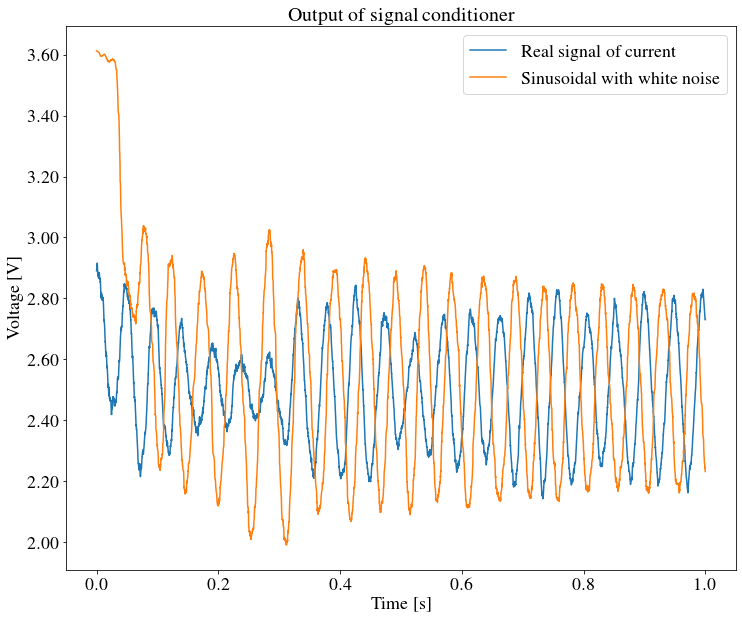

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
formatter1 = EngFormatter(places=2)

ax.plot(time, signal_real, label='Real signal of current')
ax.plot(time, signal_sml, label='Sinusoidal with white noise')
ax.set_ylabel('Voltage [V]')
ax.set_xlabel('Time [s]')
ax.yaxis.set_major_formatter(formatter1)
ax.legend(fontsize=18)
ax.set_title('Output of signal conditioner', fontsize=20)

In [16]:
data = []
frequency = []
aux = []
ampl = []
ph = []
cnt_step = -1

with open ("simulations/ltspice/\
MC_AC_AnalogRogowskiSignalProc.txt", "r") as myfile:
    for line in  myfile:
        data.append(line)            

data.pop(0)

for y in data:
    aux = y.split(" ")
    if(aux[0] == 'Step'):
        cnt_step = cnt_step + 1
        frequency.append([])
        ampl.append([])
        ph.append([])
        
    else:    
        aux = y.split("	")
        frequency[cnt_step].append(float(aux[0]))
        aux = aux[1].split(",")
        r=float(aux[0])
        im=float(aux[1].strip('\n'))
        polar = cm.polar(complex(r, im))
        ampl[cnt_step].append(polar[0]) 
        ph[cnt_step].append(polar[1]*180/np.pi) 

Text(0.5, 0, 'Frequency [Hz]')

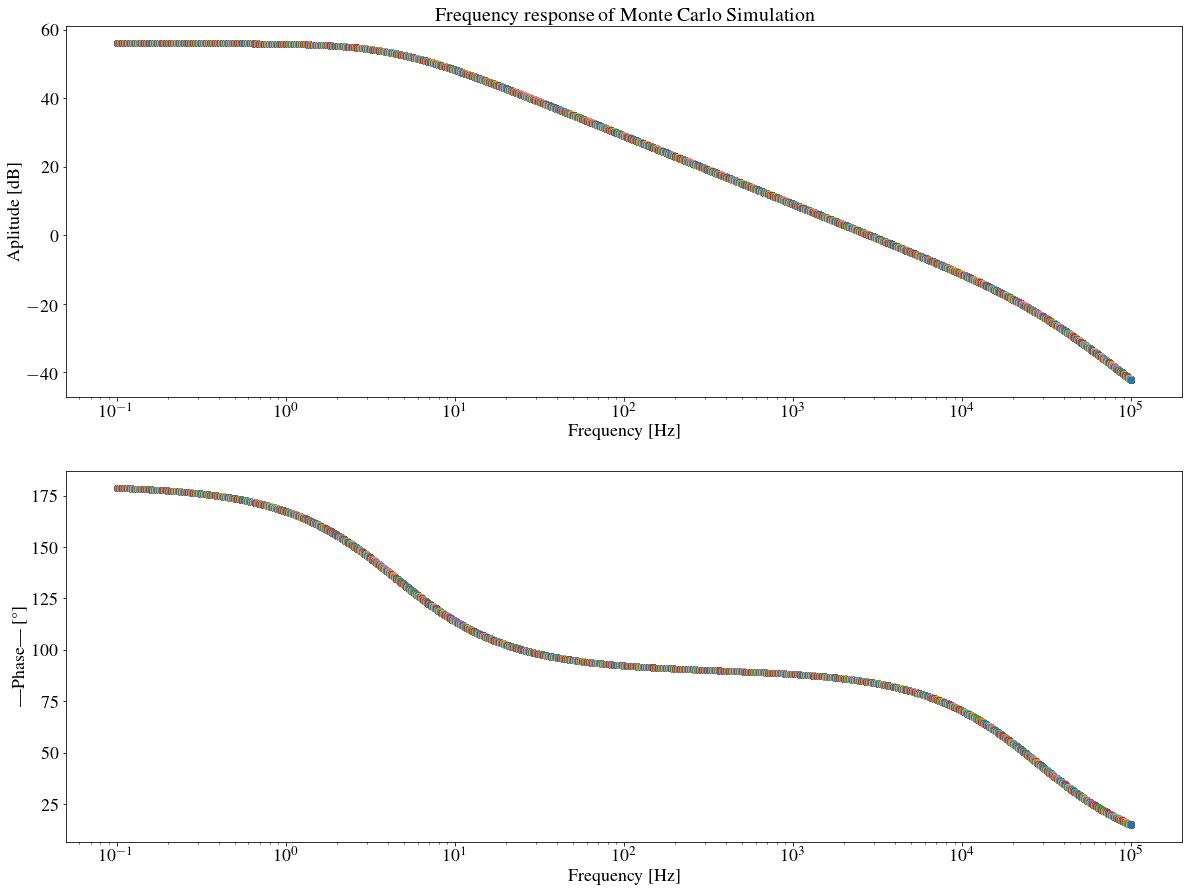

In [17]:
# Plot of Rogowski coil frequency response in Monte Carlo Simulation
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
ax[0].semilogx(frequency, 20*np.log10(np.abs(ampl)), 'o-')
ax[0].set_ylabel('Aplitude [dB]')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_title('Frequency response of Monte Carlo Simulation', fontsize=20)

ax[1].semilogx(frequency,ph, 'o-')
ax[1].set_ylabel('|Phase| [°]')
ax[1].set_xlabel('Frequency [Hz]')

### Calculation of the frequency error of the signal conditioning circuit

In [18]:
ampl_err = []
ph_err = []

# Teorical Model from SAPWin Simulator
def teorico(w):
    num = + ( +200000 )+ ( +20000j )*w
    den = + ( +312000 )+ ( +42400j )*w - ( +1120 )*w**2
    rect =  1000*num/den
    polar = cm.polar(complex(rect.real, rect.imag))
    return polar

# For loop for calulate the error of Monte Carlo Results
for y in range(0,len(ampl)):
    ampl_err.append([])
    ph_err.append([])
    for x in range(0,len(ampl[0])):
        tvalue = teorico(2*frequency[y][x]*np.pi)
        ampl_err[y].append(((tvalue[0] - ampl[y][x])/tvalue[0])*100)
        ph_err[y].append(((tvalue[1]*180/np.pi - ph[y][x])/(tvalue[1]\
                           *180/np.pi))*100)

### Plot of Error in frequency of Monte Carlo results of conditioning circuit simulations 

Text(0.5, 1.0, 'Signal conditioner frequency error')

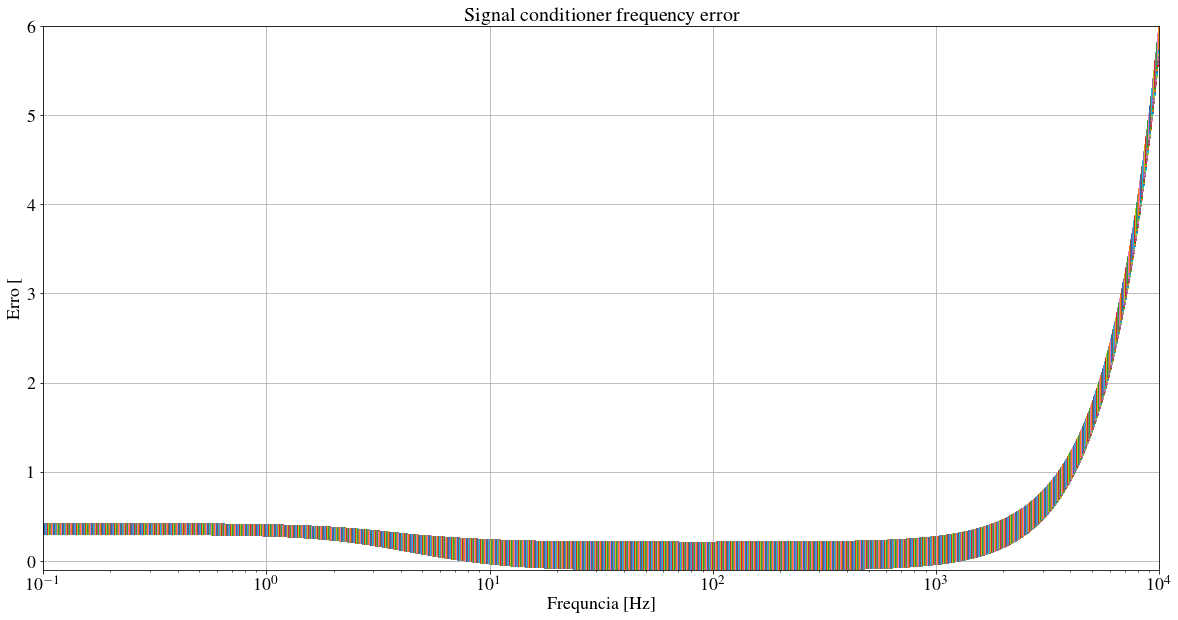

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
ax.semilogx(frequency, ampl_err)
ax.set_ylabel('Erro [%]')
ax.set_xlim(0.1,10000)
ax.set_ylim(-0.1,6)
ax.grid(True)
ax.set_xlabel('Frequncia [Hz]')
ax.set_title('Signal conditioner frequency error', fontsize=20)

In [20]:
data = []
frequency = []
aux = []
ampl = []
ph = []
cnt_step = -1

with open ("simulations/ltspice/\
MC_Noise_AnalogRogowskiSignalProc_curve.txt", "r") as myfile:
    for line in  myfile:
        data.append(line)            

data.pop(0)

for y in data:
    aux = y.split(" ")
    if(aux[0] == 'Step'):
        cnt_step = cnt_step + 1
        frequency.append([])
        ampl.append([])
        ph.append([])
        
    else:
        aux = y.split("	")
        frequency[cnt_step].append(float(aux[0]))
        ampl[cnt_step].append(float(aux[1].strip('\n'))) 

Text(0.5, 1.0, 'Noise simulation with Monte Carlo Method')

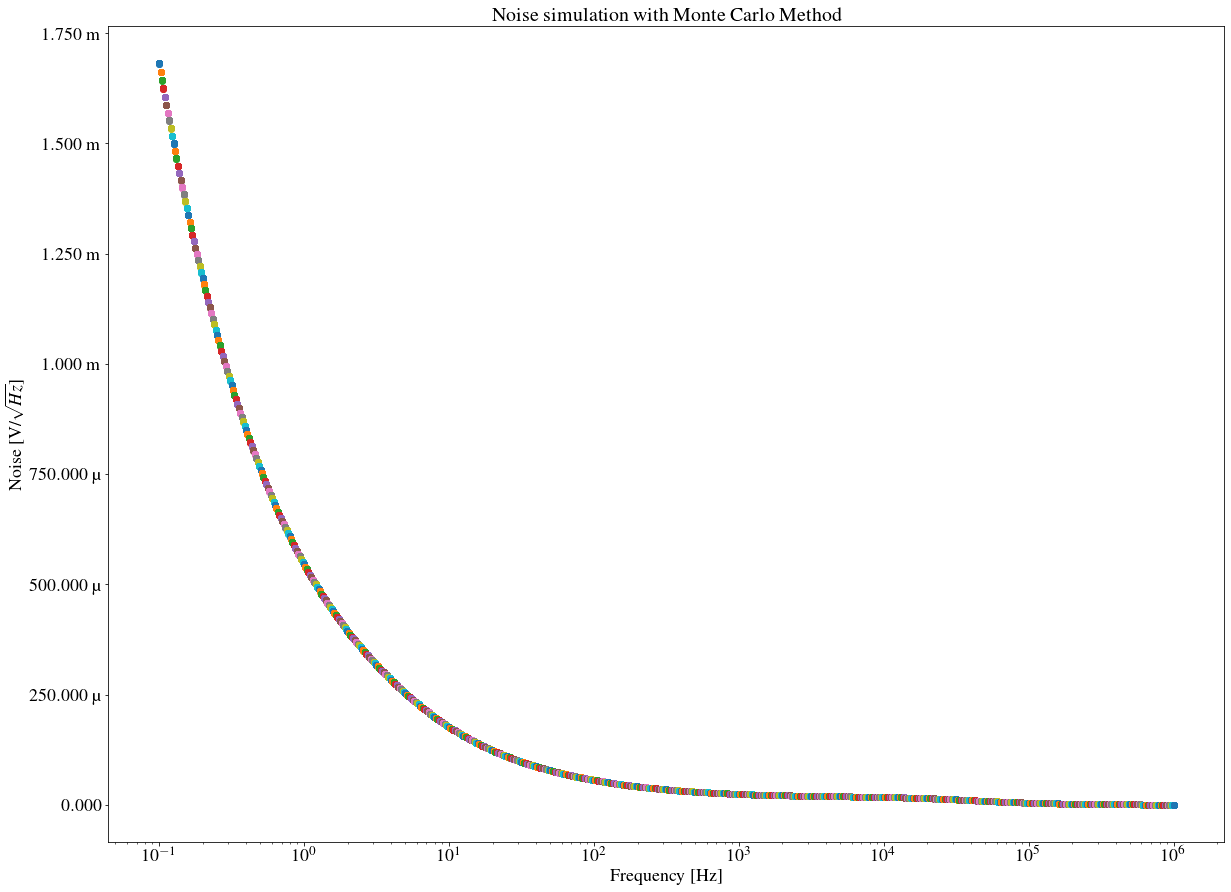

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,15))
formatter1 = EngFormatter(places=3)

ax.semilogx(frequency, ampl, 'o-')
ax.set_ylabel('Noise [V/$\sqrt{Hz}$]')
ax.set_xlabel('Frequency [Hz]')
ax.yaxis.set_major_formatter(formatter1)
ax.set_title('Noise simulation with Monte Carlo Method', fontsize=20)

In [22]:
# Get 
data = []
integral = []

with open ("simulations/ltspice/\
MC_Noise_AnalogRogowskiSignalProc.log", "r") as myfile:
    for line in  myfile:
        data.append(line)            

info = False

for x in data:
    aux = x.split(" ")
    
    if(info == True):
        if(aux[2] == ''):
            aux_2 = x.split('	')
            integral.append(2*float(aux_2[1]))
    if(aux[0] == 'Measurement:'):
        info = True
        
    if(len(integral) == 100):
        break

steps = range(1,101)
max_uncertainty = np.amax(integral)
min_uncertainty =  np.amin(integral)
mean_uncertainty =  np.mean(integral)

| Temperature  | Minimun     |   Typic     |  Maximum   |
|--------------|-------------|-------------|------------|
|     -20°C    |  7.0893mV   |  7.08934mV  |  7.08938mV  |
|      20°C    |  7.5630mV   |  7.5631mV   |  7.56316mV  |
|      80°C    |  8.4708mV   |  8.4754mV   |  8.4756mV  |

Text(0.5, 1.0, 'Measurement uncertainty per Monte Carlo steps')

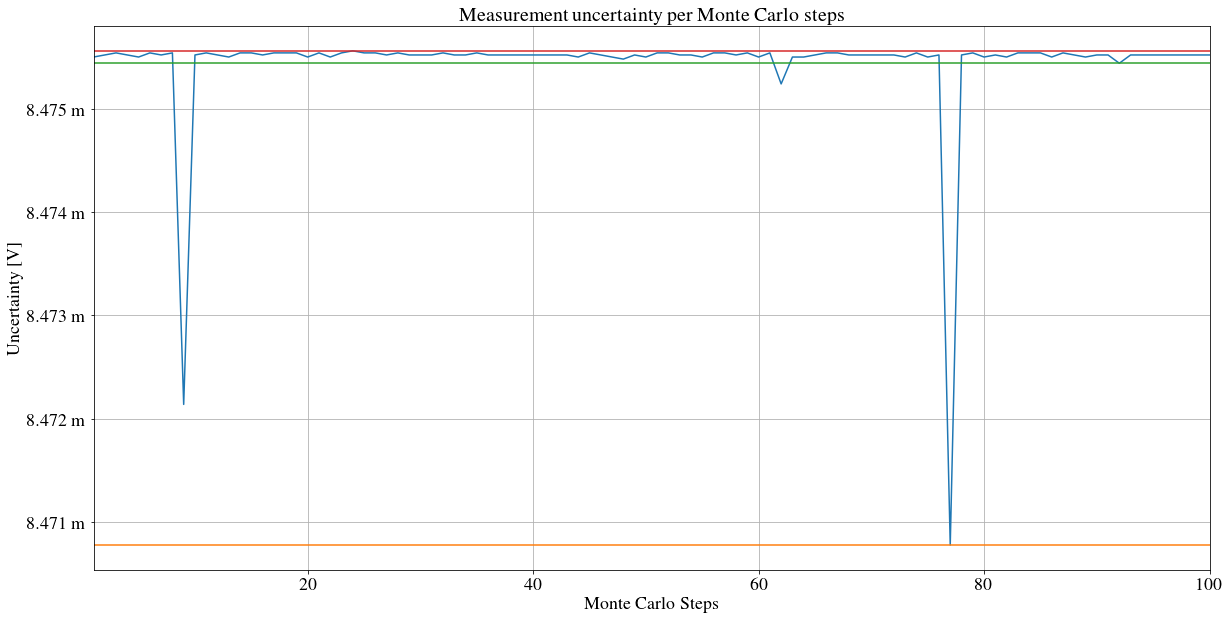

In [23]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
ax.plot(steps, integral)
ax.plot(steps, np.full((100),min_uncertainty))
ax.plot(steps, np.full((100),mean_uncertainty))
ax.plot(steps, np.full((100),max_uncertainty))
ax.set_ylabel('Uncertainty [V]')
formatter1 = EngFormatter(places=3)  # U+2009
ax.yaxis.set_major_formatter(formatter1)
ax.set_xlim(1,100)
ax.grid(True)
ax.set_xlabel('Monte Carlo Steps')
ax.set_title('Measurement uncertainty per Monte Carlo steps', fontsize=20)